In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("fever_medicine_data.csv")

df = df.drop(
    [
        "Humidity",
        "AQI",
        "Physical_Activity",
        "Diet_Type",
        "Previous_Medication",
        "Recommended_Medication",
    ],
    axis=1,
)

df.to_csv("fever_diagnosis.csv", index=False)

print(df.head())

   Temperature Fever_Severity  Age  Gender   BMI Headache Body_Ache Fatigue  \
0         36.1         Normal   89  Female  24.0       No       Yes      No   
1         37.5     Mild Fever   94    Male  26.6       No        No      No   
2         36.4         Normal   92    Male  27.8       No        No      No   
3         39.8     High Fever   66    Male  18.7       No       Yes      No   
4         39.3     High Fever   28    Male  21.0       No       Yes      No   

  Chronic_Conditions Allergies Smoking_History Alcohol_Consumption  \
0                 No       Yes              No                 Yes   
1                Yes        No             Yes                 Yes   
2                 No        No              No                 Yes   
3                 No        No              No                  No   
4                Yes       Yes             Yes                 Yes   

   Heart_Rate Blood_Pressure  
0          72         Normal  
1          62           High  
2          

In [23]:
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})
df["Headache"] = df["Headache"].map({"No": 0, "Yes": 1})
df["Body_Ache"] = df["Body_Ache"].map({"No": 0, "Yes": 1})
df["Fatigue"] = df["Fatigue"].map({"No": 0, "Yes": 1})
df["Chronic_Conditions"] = df["Chronic_Conditions"].map({"No": 0, "Yes": 1})
df["Allergies"] = df["Allergies"].map({"No": 0, "Yes": 1})
df["Smoking_History"] = df["Smoking_History"].map({"No": 0, "Yes": 1})
df["Alcohol_Consumption"] = df["Alcohol_Consumption"].map({"No": 0, "Yes": 1})

# Fill missing values for numeric columns with the median
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Fill missing values for categorical columns with the mode
categorical_columns = df.select_dtypes(exclude=[np.number]).columns
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check the filled DataFrame
print(df)

     Temperature Fever_Severity  Age  Gender   BMI  Headache  Body_Ache  \
0           36.1         Normal   89       1  24.0         0          1   
1           37.5     Mild Fever   94       0  26.6         0          0   
2           36.4         Normal   92       0  27.8         0          0   
3           39.8     High Fever   66       0  18.7         0          1   
4           39.3     High Fever   28       0  21.0         0          1   
..           ...            ...  ...     ...   ...       ...        ...   
995         39.9     High Fever   59       0  22.1         1          1   
996         36.9         Normal   74       1  18.1         1          1   
997         36.1         Normal    8       1  29.6         1          1   
998         38.8     High Fever   87       1  25.2         0          0   
999         38.2     High Fever   65       1  26.0         0          1   

     Fatigue  Chronic_Conditions  Allergies  Smoking_History  \
0          0                   0   

C:\Users\xynpy\AppData\Local\Temp\ipykernel_8668\60934109.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [24]:
x = df[
    [
        "Age",
        "Temperature",
        "Gender",
        "BMI",
        "Headache",
        "Body_Ache",
        "Fatigue",
        "Chronic_Conditions",
        "Allergies",
        "Smoking_History",
    ]
].values

y = df["Fever_Severity"].values
print(x)

[[89.  36.1  1.  ...  0.   1.   0. ]
 [94.  37.5  0.  ...  1.   0.   1. ]
 [92.  36.4  0.  ...  0.   0.   0. ]
 ...
 [ 8.  36.1  1.  ...  0.   1.   1. ]
 [87.  38.8  1.  ...  0.   0.   0. ]
 [65.  38.2  1.  ...  0.   1.   1. ]]


In [25]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

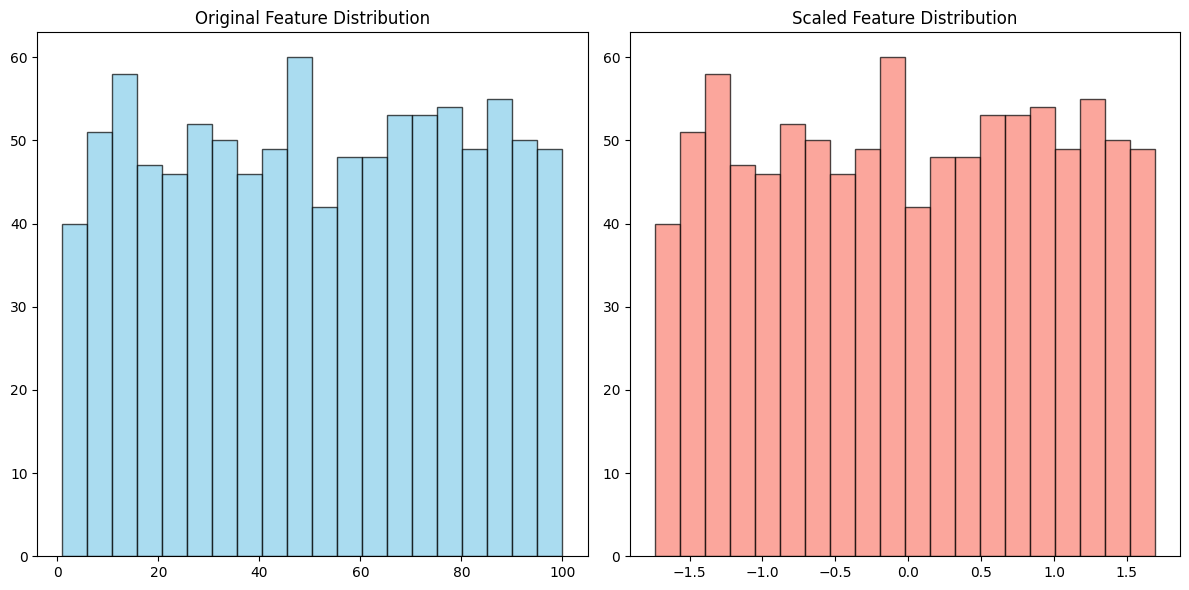

In [26]:
# Plot histograms of a feature before and after scaling
feature_index = 0  # Use the first feature for visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(x[:, feature_index], bins=20, color="skyblue", edgecolor="black", alpha=0.7)
plt.title("Original Feature Distribution")

plt.subplot(1, 2, 2)
plt.hist(
    x_scaled[:, feature_index], bins=20, color="salmon", edgecolor="black", alpha=0.7
)
plt.title("Scaled Feature Distribution")

plt.tight_layout()
plt.show()

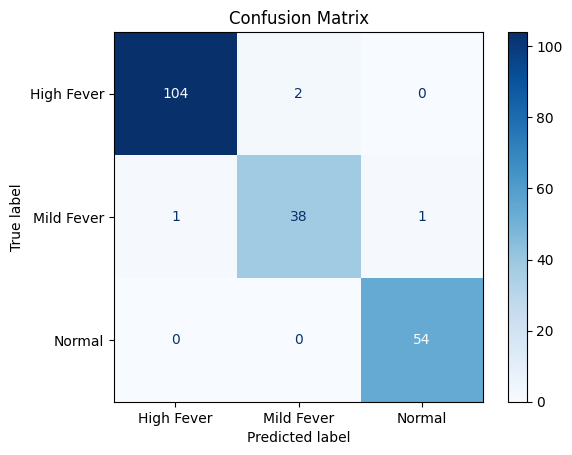

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix visualization
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [28]:
x_noisy = x + np.random.normal(0, 0.1, x.shape)
x_noisy_scaled = scaler.fit_transform(x_noisy)

x_train, x_test, y_train, y_test = train_test_split(
    x_noisy, y, test_size=0.2, random_state=42, stratify=y
)

In [29]:
model = RandomForestClassifier(
    random_state=42,
    max_depth=5,
    n_estimators=50,
    min_samples_split=10,
)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=10, n_estimators=50,
                       random_state=42)

In [30]:
y_pred = model.predict(x_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred)

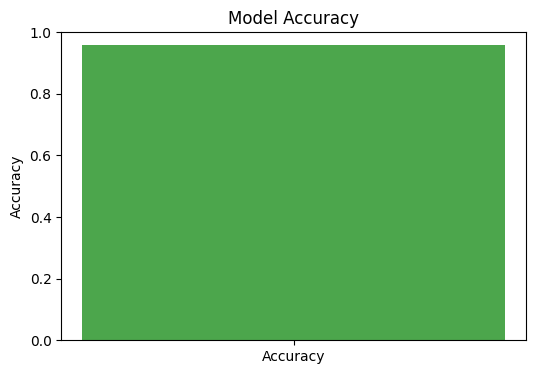

In [32]:
# Plot the accuracy score as a bar
plt.figure(figsize=(6, 4))
plt.bar(["Accuracy"], [accuracy], color="green", alpha=0.7)
plt.ylim(0, 1)  # Set y-axis range to [0, 1]
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.show()

In [33]:
def get_user_input():
    print("Please enter the following details:")
    age = 20
    temperature = 38
    gender = 0
    bmi = 19.1
    headache = 1
    body_ache = 1
    fatigue = 1
    chronic_conditions = 0
    allergies = 0
    smoking_history = 1
    user_data = np.array(
        [
            [
                age,
                temperature,
                gender,
                bmi,
                headache,
                body_ache,
                fatigue,
                chronic_conditions,
                allergies,
                smoking_history,
            ]
        ]
    )
    return user_data

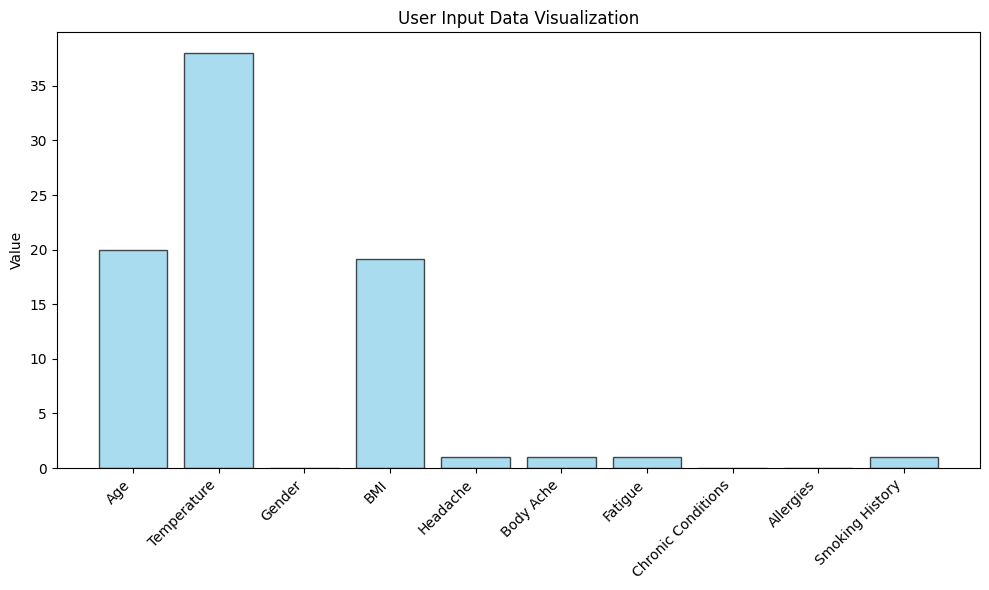

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Feature names
feature_names = [
    "Age",
    "Temperature",
    "Gender",
    "BMI",
    "Headache",
    "Body Ache",
    "Fatigue",
    "Chronic Conditions",
    "Allergies",
    "Smoking History",
]

# User data
user_data = user_data[0]  # Extract the array

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(feature_names, user_data, color="skyblue", edgecolor="black", alpha=0.7)
plt.xticks(rotation=45, ha="right")
plt.title("User Input Data Visualization")
plt.ylabel("Value")
plt.tight_layout()
plt.show()

In [34]:
user_data = get_user_input()
user_data_scaled = scaler.transform(user_data)
probabilities = model.predict_proba(user_data_scaled)

fever_probability = probabilities[0][1]
no_fever_probability = probabilities[0][0]

print(
    f"Prediction: The model is {fever_probability * 100:.2f}% confident that the user has a fever."
)
print(
    f"The model is {no_fever_probability * 100:.2f}% confident that the user does not have a fever."
)

if fever_probability > 0.5:
    print("Prediction: The user is likely to have a fever.")
else:
    print("Prediction: The user is unlikely to have a fever.")

cv_scores = cross_val_score(model, x_scaled, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

print(classification_report(y_test, y_pred))

Please enter the following details:
Prediction: The model is 17.48% confident that the user has a fever.
The model is 12.96% confident that the user does not have a fever.
Prediction: The user is unlikely to have a fever.
Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0
              precision    recall  f1-score   support

  High Fever       1.00      0.96      0.98       106
  Mild Fever       0.90      0.90      0.90        40
      Normal       0.93      1.00      0.96        54

    accuracy                           0.96       200
   macro avg       0.94      0.95      0.95       200
weighted avg       0.96      0.96      0.96       200



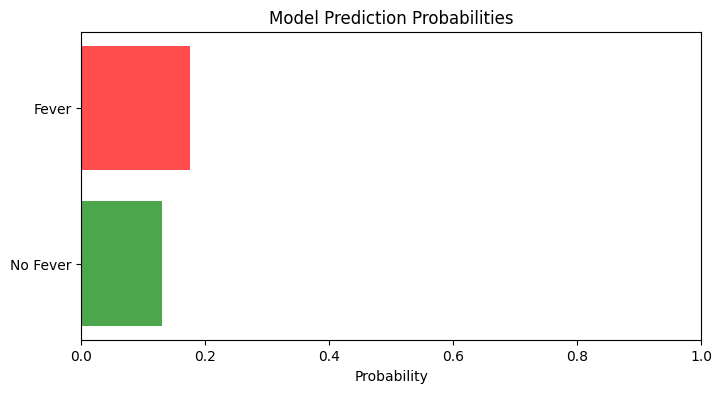

In [41]:
# Probabilities for fever and no fever
labels = ["No Fever", "Fever"]
sizes = [no_fever_probability, fever_probability]
colors = ["green", "red"]

# Bar chart for probabilities
plt.figure(figsize=(8, 4))
plt.barh(labels, sizes, color=colors, alpha=0.7)
plt.xlabel("Probability")
plt.title("Model Prediction Probabilities")
plt.xlim(0, 1)  # Probabilities range from 0 to 1
plt.show()

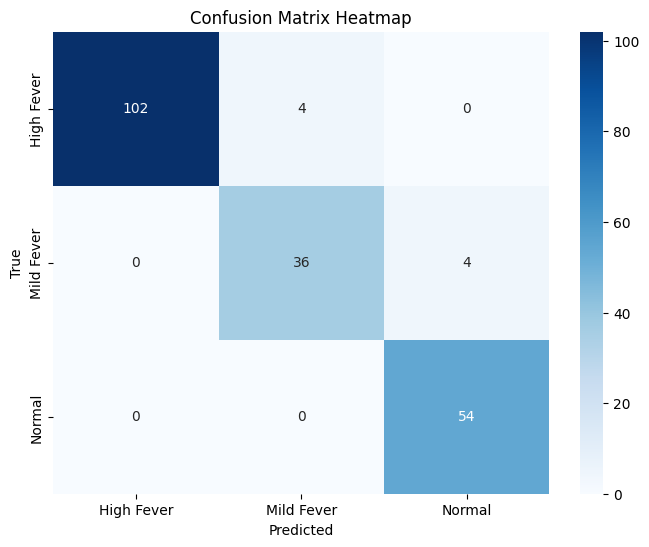

In [35]:
# Assuming y_test and y_pred are your true and predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["High Fever", "Mild Fever", "Normal"],
    yticklabels=["High Fever", "Mild Fever", "Normal"],
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap")
plt.show()

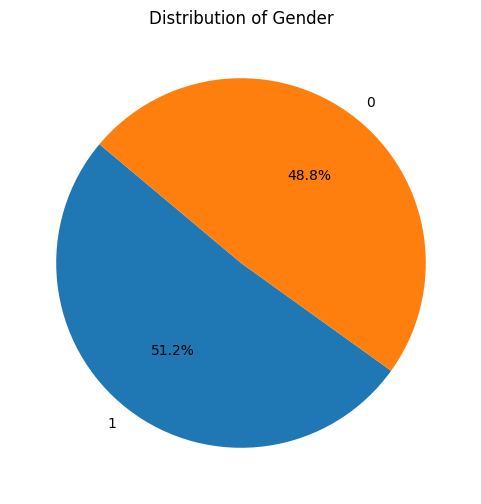

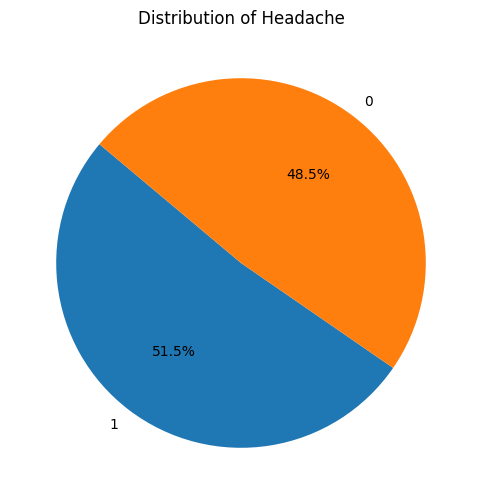

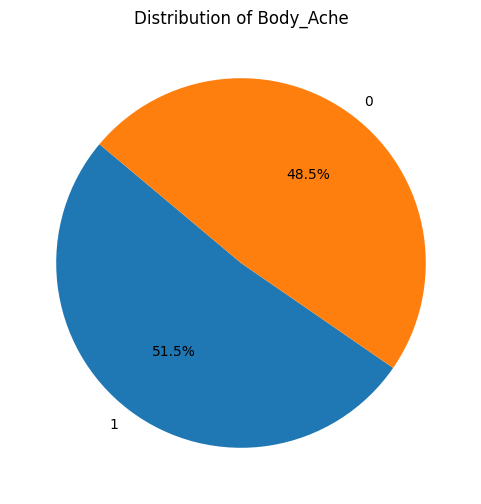

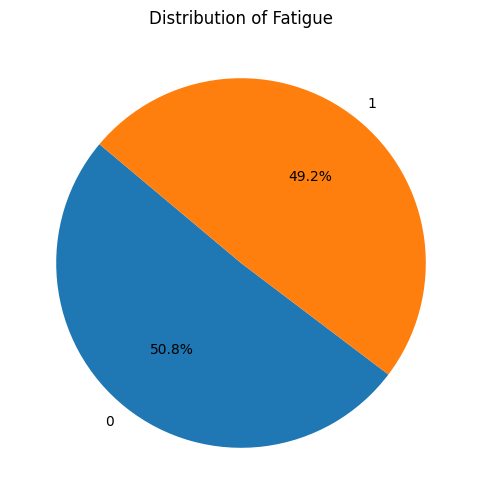

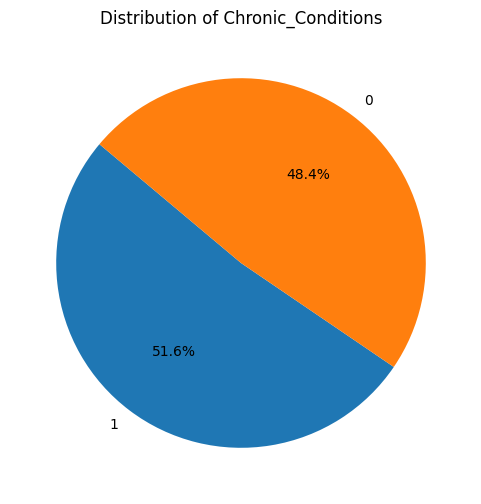

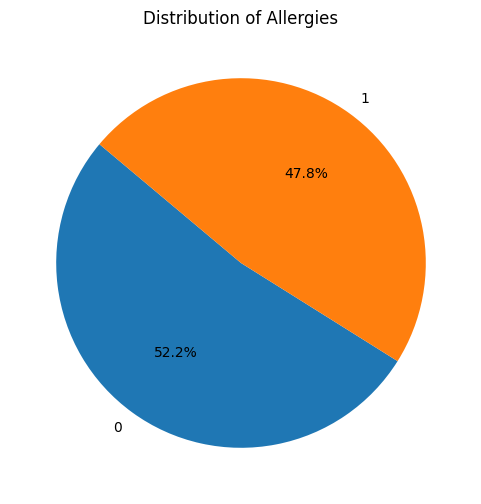

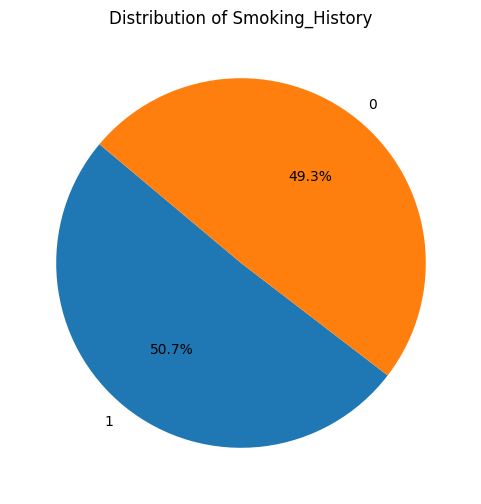

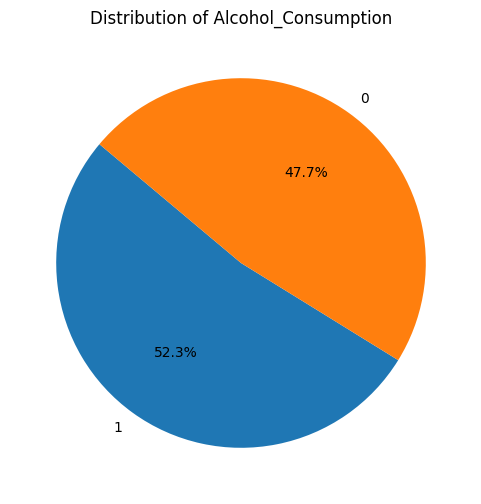

In [36]:
def plot_pie(column):
    values = df[column].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(values, labels=values.index, autopct="%1.1f%%", startangle=140)
    plt.title(f"Distribution of {column}")
    plt.show()


# Plot pie charts for specific categorical columns
for col in [
    "Gender",
    "Headache",
    "Body_Ache",
    "Fatigue",
    "Chronic_Conditions",
    "Allergies",
    "Smoking_History",
    "Alcohol_Consumption",
]:
    plot_pie(col)

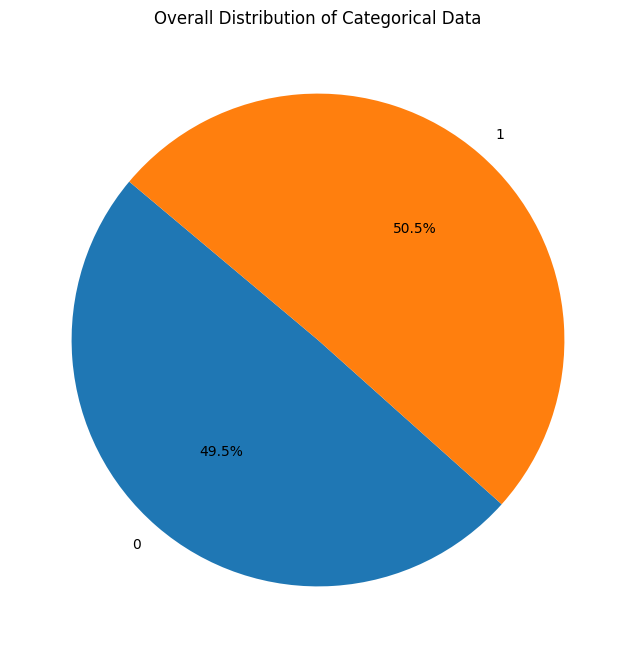

In [37]:
categorical_data = df[
    [
        "Gender",
        "Headache",
        "Body_Ache",
        "Fatigue",
        "Chronic_Conditions",
        "Allergies",
        "Smoking_History",
    ]
]


# Combine all values for a single pie chart
combined_counts = categorical_data.apply(pd.Series.value_counts).sum(axis=1)

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    combined_counts, labels=combined_counts.index, autopct="%1.1f%%", startangle=140
)
plt.title("Overall Distribution of Categorical Data")
plt.show()